Reading from the files and separating participants who completed the tasks from the rest.

In [1]:
import json
import numpy as np
import scipy.stats as stats
import statistics
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def nasa_string_to_int(nasa_string):
    sn= nasa_string.replace('[','').replace(']','').split(',')
    ntr1 = [int(y) for y in sn]
    return ntr1

In [3]:
def sak_data_to_througput(sak1, sak1t ,diflevel):
    if(len(sak1)>0):
        l= len(sak1[0].replace(" ",''))
        t= sak1t[len(sak1t)-1]-sak1t[0]
        SPC=(float(t)/diflevel)/(l-1)
        T=(1/float(SPC))*(1000/float(diflevel))*(60/5)
    else:
        T=0
        
    return T
        

In [4]:
# Opening JSON file
f = open('output2-99p.json')

In [5]:
data = json.load(f)

In [6]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     values = x.values()
#     print(values)
#     print(x['completed'])
    

In [7]:
completed_participants=[]
for x in data['data']:
    if(x['completed']):
        completed_participants.append(x['mturk_id'])
# print(completed_participants)

completed_participants

['62a1e48f9b6f6ae44dbb9f88',
 '5fd66c119e1fc75723a40b51',
 '60356e7fa40d4ebe1700d736',
 '5bd7912fbeca730001ced776',
 '60b904a66604f5e79c6066dd',
 '5b661bc3259daf00019369f2',
 '5baa21188a01680001ff1a6f',
 '62838b88bc35e0497491f8e4',
 '6023df50d5c2d7069115de3f',
 '60c048ca962103e0da201a34',
 '5b61d0768de04c000171cf1b',
 '6128188a420f8d3f27f8d8b1',
 '62b1f567d5f22515024421f1',
 '60b7ae30dc4cd72192734427',
 '6055063167ae2fa5dcb083a3',
 '5ec153013043d0034ac516bd',
 '60b005fde343f75a2b76d406',
 '609c2dcbc88bdd19e0be4b98',
 '60a0c79b332c02c8a73e57a5',
 '5e7987df47422a5443426cd7',
 '606825124609b3da3a68e07c',
 '61013bb782e4014ecabafee1',
 '60214feec65df50cd6837a48',
 '5fa154fd4cbe97227182aff7',
 '612266b4f9ae4a5d04a21dd4',
 '5f3287b83428cb05746e2214',
 '5a75b131eea3d300016ddc70',
 '615e0f1896ecb10608aa6eca',
 '5e6473fbc15dbe1f71eea95b',
 '5bc880109f7801000148601b',
 '60de9d0dc5c9e34e09b6385d',
 '5d8186b89d5990001958d771',
 '601f249c952eef4747d890ae',
 '5cfd0b3f0526d1000184ad8f',
 '62e49d54d098

In [8]:
f = open('output1-99p.json')

In [9]:
jsonpmodel = json.load(f)

In [10]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     print('\n')
#     values = x.values()
#     print(values)

In [11]:
completed_p_models=[]
for x in jsonpmodel['data']:
#     print(x['sequence_type'])
    m=x['mturk_id']
    if(m in completed_participants):
        completed_p_models.append(x)
        

In [12]:
filename='completedparticipants.json'
with open(filename, 'w') as json_file:
    json.dump(completed_p_models, json_file, 
                        indent=4,  
                        separators=(',',': '))

In [13]:
c_file=open(filename)
c_p=json.load(c_file)

In [14]:
# for x in c_p:
#     print(x['mturk_id'])


completedparticipants.json is the file that includes data of all participants who completed the task 
and c_p is the json varible of the file



In [15]:
# ----------------Experiment Sequences---------------------------

# N : first nbackn difficulty (H/E)

# Q : first Questionaire (1: NASA-TLX and 2: MRQ)

# S : SakeDifficulty(H/E)

# _________________________________________________________________________
# seq_number/Progress | 1.n1 | 2.s | 3.q1| 4.q2|5.n2 | 6.s |7.q1 |8.q2 |
# _________________________________________________________________________
#          1          |  E   | E   |  1  |  2  |  H  |  E  |  1  |  2  |
#          2          |  E   | E   |  2  |  1  |  H  |  E  |  2  |  1  |
#          3          |  H   | E   |  1  |  2  |  E  |  E  |  1  |  2  |
#          4          |  H   | E   |  2  |  1  |  E  |  E  |  2  |  1  |
#          5          |  E   | H   |  1  |  2  |  H  |  H  |  1  |  2  |
#          6          |  E   | H   |  2  |  1  |  H  |  H  |  2  |  1  |
#          7          |  H   | H   |  1  |  2  |  E  |  H  |  1  |  2  |
#          8          |  H   | H   |  2  |  1  |  E  |  H  |  2  |  1  |
# ________________________________________________________________________


In [16]:
 #  sequence type /progress matrix 
E_n = 1; # easy nbackn
H_n = 3; # hard nbackn
E_s = 500;  # easy sak in ms
H_s = 1000; #hard sak in ms
seq_prog = [
    [E_n, E_s, 1, 2, H_n, E_s, 1, 2],
    [E_n, E_s, 2, 1, H_n, E_s, 2, 1],
    [H_n, E_s, 1, 2, E_n, E_s, 1, 2],
    [H_n, E_s, 2, 1, E_n, E_s, 2, 1],
    [E_n, H_s, 1, 2, H_n, H_s, 1, 2],
    [E_n, H_s, 2, 1, H_n, H_s, 2, 1],
    [H_n, H_s, 1, 2, E_n, H_s, 1, 2],
    [H_n, H_s, 2, 1, E_n, H_s, 2, 1]
];

conEX : Easy NBACKN----
conHX : Hard NBACKN----
conXE: Easy SAK----
conXH: Hard SAK

In [17]:
nasa_1_t_array=[]
nasa_2_t_array=[]
nasa_1_r_array=[]
nasa_2_r_array=[]

seq_type_array=[]

mrq_1_array=[]
mrq_2_array=[]

mrq_conEH_array=[]
mrq_conHH_array=[]
mrq_conEE_array=[]
mrq_conHE_array=[]

nasa_r_conEH_array=[]
nasa_r_conHH_array=[]
nasa_r_conEE_array=[]
nasa_r_conHE_array=[]

nasa_t_conEH_array=[]
nasa_t_conHH_array=[]
nasa_t_conEE_array=[]
nasa_t_conHE_array=[]

throughput1_array=[]
throughput2_array=[]


for x in c_p:
    st= x['sequence_type']
    seq_type_array.append(st)
    
    sak1= x['sak_1_actions']
    sak2= x['sak_2_actions']
    sak1t= x['sak_1_actions_t']
    sak2t= x['sak_2_actions_t']
#     print(len(x['nasa_1_r']))

    if(len(x['nasa_1_r'])>0):
        ntr1= nasa_string_to_int(x['nasa_1_r'][0])
    else: 
        ntr1=[]
        
    if(len(x['nasa_2_r'])>0):
        ntr2= nasa_string_to_int(x['nasa_2_r'][0])
    else: 
        ntr2=[]
        
    if(len(x['nasa_1_t'])>0):
        ntt1= nasa_string_to_int(x['nasa_1_t'][0])
    else: 
        ntt1=[]
        
    if(len(x['nasa_2_t'])>0):
        ntt2= nasa_string_to_int(x['nasa_2_t'][0])
    else: 
        ntt2=[]
    
    
    nasa_1_r_array.append(ntr1)
    nasa_1_t_array.append(ntt1)
    nasa_2_r_array.append(ntr2)
    nasa_2_t_array.append(ntt2)
    
    
    
    if(len(x['mrq_1'])>0): 
        s=x['mrq_1'][0].replace('"','').replace('[',"").replace(']',"").split(',')
        mrq1 = [int(y) for y in s]
        mrq1.pop()
    else: 
        mrq1=[] 
        
        

    if(len(x['mrq_2'])>0): 
        s=x['mrq_2'][0].replace('"','').replace('[',"").replace(']',"").split(',')
        mrq2 = [int(y) for y in s]
        mrq2.pop()
    else: 
        mrq2=[]
        
        
        
    mrq_1_array.append(mrq1)
    mrq_2_array.append(mrq2)
    
    if(st==1 or st==2):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conEE_array.append(mrq1)
            mrq_conHE_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0):
            nasa_r_conEE_array.append(ntr1)
            nasa_r_conHE_array.append(ntr2)
            nasa_t_conEE_array.append(ntt1)
            nasa_t_conHE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)
        

       
    if(st==3 or st==4):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conHE_array.append(mrq1)
            mrq_conEE_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0):
            nasa_r_conHE_array.append(ntr1)
            nasa_r_conEE_array.append(ntr2)
            nasa_t_conHE_array.append(ntt1)
            nasa_t_conEE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)


        
    if(st==5 or st==6):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conEH_array.append(mrq1)
            mrq_conHH_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0): 
            nasa_r_conEH_array.append(ntr1)
            nasa_r_conHH_array.append(ntr2)
            nasa_t_conEH_array.append(ntt1)
            nasa_t_conHH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        

        
        
    if(st==7 or st==8):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conHH_array.append(mrq1)
            mrq_conEH_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0): 
            nasa_r_conHH_array.append(ntr1)
            nasa_r_conEH_array.append(ntr2)
            nasa_t_conHH_array.append(ntt1)
            nasa_t_conEH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        
    
    throughput1_array.append(throughput1)
    throughput2_array.append(throughput2)
        
        


In [18]:
throughput2_array

[2.586729538565174,
 2.717926497813842,
 2.9121377390060412,
 1.898373726507625,
 1.2424982178911779,
 1.6281456836442147,
 0,
 3.3080851175551667,
 1.6989279450050734,
 2.2047265526650652,
 1.678565472123439,
 2.5554899474382182,
 3.4307278860998345,
 1.357970803627722,
 1.331931300385559,
 2.237307095822846,
 1.8373909049150208,
 2.9280790581345695,
 2.87363967751377,
 3.3456903584225692,
 2.542265158256006,
 2.527230913088529,
 1.147122634059567,
 1.4980719259471607,
 2.767191785809646,
 1.3733591219657348,
 1.038768317566314,
 1.4231338310536839,
 2.059503498127265,
 2.897820335139221,
 1.5739081012547547,
 3.761578609156309,
 2.8673101047080203,
 4.637642195822761,
 2.561576354679803,
 0,
 1.372320579805445,
 3.4597471723220217,
 2.2624063478531733,
 3.1223838722085206,
 2.2138364779874213,
 2.67022696929239,
 2.308548500130543,
 1.8407888120946643,
 3.154481993165289,
 1.8967334035827188,
 1.9959664843961162,
 4.520662375313252,
 1.8010310902991962,
 3.860106867773469,
 3.7873607

<b>Starting the analysis from here:

<hr style="width:100%;text-align:left;margin-left:0">

<b>Analysis 1: Paired t-test to see effect of first task on second one 

-----------------------------------------------------------------------------------------------------------------------

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [19]:
mrqEX= mrq_conEE_array + mrq_conEH_array

In [20]:
mrqHX= mrq_conHE_array + mrq_conHH_array

In [21]:
mrqEX=np.array(mrqEX)


In [22]:
mrqETX=pd.DataFrame(mrqEX).mean().mean()
mrqETX

1.4981992797118848

In [23]:
mrqHX=np.array(mrqHX)

In [24]:
mrqHTX=pd.DataFrame(mrqHX).mean().mean()
mrqHTX

1.4777911164465787

In [25]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_rel(mrqHX[:,i], mrqEX[:,i])
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_rel(mrqHX_avg_array,mrqEX_avg_array)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [26]:
p_mrq_pttest

[0.4845452069267472,
 0.3064682531710686,
 0.6824691758413888,
 0.08814012262924528,
 0.6141853378134425,
 0.5833261904352833,
 0.6289387648115619,
 0.03226933456988775,
 0.25023987041412965,
 0.7099732718172919,
 0.8167016975851018,
 0.5790211294686735,
 0.2808554445053354,
 0.13010863576980447,
 0.25340168965859183,
 0.8441960336353125,
 0.08814012262924528,
 0.5510200889465597]

In [27]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [28]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.58084802, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [29]:
p_mrq_pttest

[0.4845452069267472,
 0.3064682531710686,
 0.6824691758413888,
 0.08814012262924528,
 0.6141853378134425,
 0.5833261904352833,
 0.6289387648115619,
 0.03226933456988775,
 0.25023987041412965,
 0.7099732718172919,
 0.8167016975851018,
 0.5790211294686735,
 0.2808554445053354,
 0.13010863576980447,
 0.25340168965859183,
 0.8441960336353125,
 0.08814012262924528,
 0.5510200889465597]

<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [30]:
nasaEX= nasa_r_conEE_array + nasa_r_conEH_array

In [31]:
nasaHX= nasa_r_conHE_array + nasa_r_conHH_array

In [32]:
nasaEX=np.array(nasaEX)

In [33]:
nasaHX=np.array(nasaHX)

In [34]:
nasaETX=pd.DataFrame(nasaEX).mean().mean()
nasaETX

49.79609929078014

In [35]:
nasaHTX=pd.DataFrame(nasaHX).mean().mean()
nasaHTX

50.85106382978724

In [36]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_rel(nasaHX[:,i], nasaEX[:,i])
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_rel(nasaHX_avg_array,nasaEX_avg_array)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [37]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [38]:
p_nasa_pttest

[0.032237484097584986,
 0.8823599490069501,
 0.1767316697349605,
 0.7992122381303003,
 0.09208860831795304,
 0.4358875606041561,
 0.4732997278954202]

In [39]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([0.22566239, 1.        , 1.        , 1.        , 0.64462026,
        1.        , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 2: two-sample t-test to see effect of one-key text entry task difficulty on questionaires

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [40]:
mrqXE= mrq_conEE_array + mrq_conHE_array

In [41]:
mrqXH= mrq_conEH_array + mrq_conHH_array

In [42]:
mrqEX=np.array(mrqXE) #just did not want the notation. do not confuse EX and XE 

In [43]:
mrqHX=np.array(mrqXH) #just did not want the notation. do not confuse EX and XE 

In [44]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_ind(mrqHX[:,i], mrqEX[:,i], equal_var=True)
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_ind(mrqHX_avg_array,mrqEX_avg_array, equal_var=True)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [45]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [46]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.6134313 , 1.        , 0.80130473, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [47]:
p_mrq_pttest

[0.03407951684150649,
 0.6806871469304578,
 0.04451692927039891,
 0.0883617860803265,
 0.468987882266515,
 0.26624295611636317,
 0.4278214491379191,
 0.1018028419095543,
 0.28787848128350474,
 0.5396463010919387,
 0.10598191798460302,
 0.6690203886240371,
 0.3505533956313803,
 0.8414282439601026,
 0.6389796182952435,
 0.7456337917860583,
 0.11504763994681916,
 0.10440437831993295]

In [48]:
# mrqHX=pd.DataFrame(mrqHX)
# mrqEX=pd.DataFrame(mrqEX)



# mrqHX_avg_array= np.sum(mrqHX, axis=1)/np.count_nonzero(mrqHX, axis=1)
# mrqEX_avg_array= np.sum(mrqEX, axis=1)/np.count_nonzero(mrqEX, axis=1)
# r_mrq_avg,p_mrq_avg = stats.ttest_ind(mrqHX_avg_array,mrqEX_avg_array, equal_var=True)
# r_mrq_avg,p_mrq_avg 


<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [49]:
nasaXE= nasa_r_conEE_array + nasa_r_conHE_array

In [50]:
nasaXH= nasa_r_conHH_array + nasa_r_conEH_array

In [51]:
nasaEX=np.array(nasaXE) #just did not want the notation. do not confuse EX and XE 

In [52]:
nasaHX=np.array(nasaXH) #just did not want the notation. do not confuse EX and XE 

In [53]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_ind(nasaHX[:,i], nasaEX[:,i], equal_var=True)
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_ind(nasaHX_avg_array,nasaEX_avg_array, equal_var=True)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [54]:
p_nasa_pttest

[0.5675858025735263,
 0.4186675543402252,
 0.08159975709162907,
 0.06052216696804646,
 0.05095970726304729,
 0.8662378632555212,
 0.1659373243945405]

In [55]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [56]:
p_nasa_pttest

[0.5675858025735263,
 0.4186675543402252,
 0.08159975709162907,
 0.06052216696804646,
 0.05095970726304729,
 0.8662378632555212,
 0.1659373243945405]

In [57]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([1.        , 1.        , 0.5711983 , 0.42365517, 0.35671795,
        1.        , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 3: Pearson Correlation to see the correlation of two questionaires' scale

In [58]:
nasa_r_array_pc = []
nasa_r_array_pc.extend(nasa_1_r_array)
nasa_r_array_pc.extend(nasa_2_r_array)

mrq_array_pc = []
mrq_array_pc.extend(mrq_1_array)
mrq_array_pc.extend(mrq_2_array)

nasa_r_array_pc=np.array(nasa_r_array_pc,dtype=object)
mrq_array_pc=np.array(mrq_array_pc,dtype=object)
print(mrq_array_pc.shape)


#-------------------------------------------------------------------------------------
to_delete_indices=[]
for i in range(len(mrq_array_pc)):
    if(len(nasa_r_array_pc[i])==0 or len(mrq_array_pc[i])==0):
        to_delete_indices.append(i)




cleaned_nasa_r_array_pc=[]
cleaned_mrq_array_pc=[]


for t in range(len(mrq_array_pc)):
    if t in  to_delete_indices:
        print('KACJ')
    else:
        cleaned_nasa_r_array_pc.append(nasa_r_array_pc[t])
        cleaned_mrq_array_pc.append(mrq_array_pc[t])
#-------------------------------------------------------------------------------------

(196, 17)
KACJ
KACJ
KACJ
KACJ
KACJ


In [59]:
nasa_r_array_pc=np.array(cleaned_nasa_r_array_pc)
mrq_array_pc=np.array(cleaned_mrq_array_pc)

nasa_r_array_pc_avg = []
mrq_array_pc_avg = []

for i in range(len(nasa_r_array_pc)):
    nasa_r_array_pc_avg.append(np.mean(nasa_r_array_pc[i]))
    mrq_array_pc_avg.append(np.mean(mrq_array_pc[i]))


# print(mrq_array_pc.shape)

    
new_mrq_array_pc = []
new_nasa_r_array_pc = []

for i in range(len(nasa_r_array_pc)):
    tmpn=[nasa_r_array_pc_avg[i]]
    tmpm=[mrq_array_pc_avg[i]]
    
    for j in range(len(mrq_array_pc[i])):
        tmpm.append(mrq_array_pc[i][j])
        
    for k in range(len(nasa_r_array_pc[i])):
        tmpn.append(nasa_r_array_pc[i][k])
    
    
    new_mrq_array_pc.append(tmpm)
    new_nasa_r_array_pc.append(tmpn)

In [60]:
for ix in range(len(mrq_array_pc_avg)):
    new_mrq_array_pc.append(np.append(mrq_array_pc_avg[ix],mrq_array_pc[ix]))
    new_nasa_r_array_pc.append(np.append(nasa_r_array_pc_avg[ix],nasa_r_array_pc[ix]))

In [61]:
new_mrq_array_pc = np.array(new_mrq_array_pc)

In [62]:
new_nasa_r_array_pc = np.array(new_nasa_r_array_pc)

In [63]:
new_mrq_array_pc= np.transpose(new_mrq_array_pc)

In [64]:
new_nasa_r_array_pc=  np.transpose(new_nasa_r_array_pc)

In [65]:
c_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
p_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
for i in range(len(new_nasa_r_array_pc)):
    for j in range(len(new_mrq_array_pc)):
        c,p = stats.pearsonr(new_nasa_r_array_pc[i], new_mrq_array_pc[j])
        c_matrix[i][j]=c
        p_matrix[i][j]=p

In [66]:
c_matrix


array([[ 0.25027024,  0.23527346,  0.21883762,  0.15506435,  0.14509963,
         0.21476655,  0.17389089,  0.09159474,  0.04875611,  0.1071216 ,
         0.13556274,  0.1333601 ,  0.08718549,  0.18240405,  0.13104802,
         0.09659937, -0.03264013,  0.13326836],
       [ 0.19957861,  0.23470572,  0.24840776,  0.13963543,  0.12835688,
         0.12973062,  0.08122427,  0.0928005 ,  0.00525894,  0.11467157,
         0.11590601,  0.07198281,  0.05265793,  0.07597474,  0.199261  ,
         0.00422737,  0.00837703,  0.10816453],
       [ 0.33539813,  0.20256282,  0.19350241,  0.1421924 ,  0.26292753,
         0.33814673,  0.21225621,  0.10874212,  0.14604228,  0.15446906,
         0.10291009,  0.14484366,  0.29015166,  0.38590774,  0.10811612,
         0.15614417, -0.07957691,  0.22198768],
       [ 0.20712598,  0.09480975,  0.07621278,  0.15562008,  0.12547957,
         0.13280418,  0.14237303,  0.13784812,  0.0621108 ,  0.13450768,
         0.13622045,  0.12847292,  0.09252709,  0.118

In [67]:
rej_matrix, p_matrix_adjusted, c_b, p_b = multipletests(p_matrix.reshape(-1), alpha=0.05, method='bonferroni')
p_matrix_adjusted

array([9.13601480e-05, 4.20834160e-04, 2.00604099e-03, 2.98905412e-01,
       5.65398543e-01, 2.90139989e-03, 8.07882754e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.27200813e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.08137722e-02, 4.45022910e-04,
       1.11042590e-04, 7.89316946e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.11041074e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.14172431e-09, 8.41369224e-03, 1.78237774e-02, 6.76162716e-01,
       2.32798587e-05, 1.42910441e-09, 3.63014480e-03, 1.00000000e+00,
       5.33170482e-01, 3.10835736e-01, 1.00000000e+00, 5.74447982e-01,
       9.57452923e-07, 6.50559883e-13, 1.00000000e+00, 2.78324462e-01,
       1.00000000e+00, 1.50051603e-03, 5.69173624e-03, 1.00000000e+00,
      

Correllation of average values and each dimention separately-- zero indices are for averages

In [68]:
p_matrix_adjusted= np.array(p_matrix_adjusted).reshape(7,18)
rej_matrix= np.array(rej_matrix).reshape(7,18)

In [69]:
rej_matrix

array([[ True,  True,  True, False, False,  True, False, False, False,
        False, False, False, False,  True, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False],
       [ True,  True,  True, False,  True,  True,  True, False, False,
        False, False, False,  True,  True, False, False, False,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False]]

<AxesSubplot:>

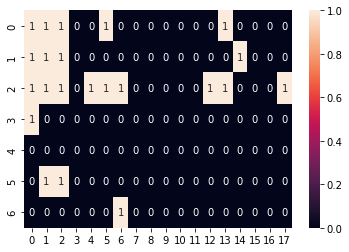

In [70]:
sns.heatmap(rej_matrix,annot=True)

In [71]:
p_matrix_adjusted

array([[9.13601480e-05, 4.20834160e-04, 2.00604099e-03, 2.98905412e-01,
        5.65398543e-01, 2.90139989e-03, 8.07882754e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 4.27200813e-02, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.08137722e-02, 4.45022910e-04, 1.11042590e-04, 7.89316946e-01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.11041074e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [2.14172431e-09, 8.41369224e-03, 1.78237774e-02, 6.76162716e-01,
        2.32798587e-05, 1.42910441e-09, 3.63014480e-03, 1.00000000e+00,
        5.33170482e-01, 3.10835736e-01, 1.00000000e+00, 5.74447982e-01,
        9.57452923e-07, 6.50559883e-13, 1.00000000e+00, 2.78324462e-01,
        1.00000000e+00, 1.50051603e-03],
       [5.691

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b>ANALYSIS 4:  Factor Analysis -- Determining which scales are better predictors 
    

In [72]:
fa_array = []

for ix in range(len(mrq_array_pc)):
    fa_array.append(np.append(mrq_array_pc[ix],nasa_r_array_pc[ix]))

fa_array=np.array(fa_array,dtype='float')

In [73]:
chi_square_value,p_value=calculate_bartlett_sphericity(fa_array)
chi_square_value, p_value

(1467.482065401292, 5.2811763780118026e-170)

In [74]:
kmo_all,kmo_model = calculate_kmo(fa_array)

In [75]:
kmo_all,kmo_model

(array([0.84168965, 0.79622397, 0.76575781, 0.78666976, 0.79286171,
        0.67799805, 0.69391364, 0.78857573, 0.84277569, 0.79744973,
        0.81891489, 0.84968866, 0.87800312, 0.64573164, 0.7539244 ,
        0.70025401, 0.84728071, 0.74901987, 0.76839128, 0.80208523,
        0.4639596 , 0.69872339, 0.71837445]),
 0.7717090864489947)

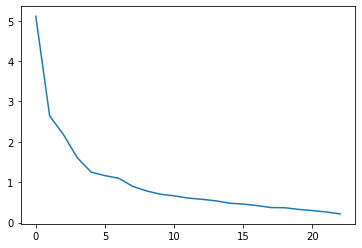

In [76]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(fa_array, 25, rotation=None)
fa.fit(fa_array, 23)
eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev
plt.plot(ev)

In [77]:
ev


array([5.11220199, 2.64478546, 2.17920889, 1.60579301, 1.24941527,
       1.16193726, 1.0959769 , 0.89695506, 0.78371268, 0.70090868,
       0.66096393, 0.60587251, 0.5755301 , 0.53810231, 0.47943532,
       0.45645873, 0.41962643, 0.37093048, 0.36591199, 0.32570352,
       0.2959113 , 0.26145046, 0.21320772])

In [78]:
fa = FactorAnalyzer()
fa.fit(fa_array,7)
x_f=fa.loadings_


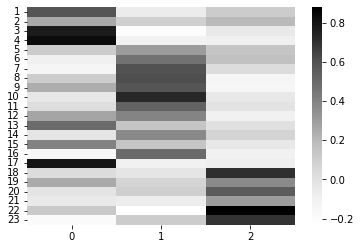

In [137]:
yticklables=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sns.heatmap(data= x_f,yticklabels=yticklables,cmap="Greys")
plt.savefig("fa.svg")

In [80]:
# Get variance of each factors
fa.get_factor_variance()
# Exploratory Factor Analysis To find how many factors are present in the data
# Finding how many factors are present in the data


# fa = FactorAnalyzer()
# Factors=fa.fit(fa_array)
 
# # Plotting the scree-plot
# EigenValues=Factors.get_eigenvalues()

# plt.plot(EigenValues)

(array([3.06588058, 2.95002313, 2.48634618]),
 array([0.13329916, 0.12826188, 0.10810201]),
 array([0.13329916, 0.26156103, 0.36966304]))

-------------------------------------------------------------------------------------------------------------------------------

<hr style="width:100%;text-align:left;margin-left:0">
<b>ANALYSIS 5: Performance vs MWL

In [81]:
mrq_t_pq = mrq_1_array + mrq_2_array

In [82]:
mrq_t_pq_df=pd.DataFrame(mrq_t_pq)
mrq_t_pq_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,4,0,0,4,4,3,3,2,2,2,1,0,2,1,2,0
1,2,4,0,0,4,4,3,3,3,2,2,0,3,4,3,2,0
2,0,3,0,0,4,1,3,0,0,4,0,0,0,4,3,3,0
3,2,2,0,0,0,4,4,2,2,2,2,0,0,3,2,4,0
4,4,1,1,1,4,4,4,4,4,4,4,4,1,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,0,2,4,4,4,2,2,4,4,0,0,4,0,4,0
192,0,0,0,0,1,2,2,0,0,1,0,0,0,3,0,3,0
193,0,1,0,0,2,1,2,0,0,0,1,0,0,1,1,2,0
194,0,0,0,0,4,1,3,2,3,1,4,0,0,4,4,3,0


In [83]:
# mrq_t_pq_df[1]

In [84]:
# stats.f_oneway(mrq_t_pq_df[0],mrq_t_pq_df[1],mrq_t_pq_df[2],mrq_t_pq_df[3],mrq_t_pq_df[4],mrq_t_pq_df[5],mrq_t_pq_df[6],mrq_t_pq_df[7],mrq_t_pq_df[8],mrq_t_pq_df[9],mrq_t_pq_df[10],mrq_t_pq_df[11],mrq_t_pq_df[12],mrq_t_pq_df[13],mrq_t_pq_df[14],mrq_t_pq_df[15],mrq_t_pq_df[1],mrq_t_pq_df[0],)

In [85]:
# yt=mrq_t_pq_df.transpose()
# groups=list(range(1, 17))

# yt,
# groups

In [86]:

# tukey = pairwise_tukeyhsd(endog=yt,
#                           groups=groups,
#                           alpha=0.05)
# print(tuc)

In [87]:
nasa_r_t_pq = nasa_1_r_array+nasa_2_r_array

<AxesSubplot:>

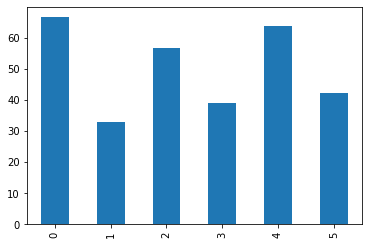

In [88]:
nasa_r_t_pq_df=pd.DataFrame(nasa_r_t_pq)
nasa_r_t_pq_df.mean().plot.bar()

In [89]:
throughput_t_pq = throughput1_array+throughput2_array

In [90]:
to_delete_indices=[]
for i in range(len(throughput_t_pq)):
    if(throughput_t_pq[i]==0 or len(nasa_r_t_pq[i])==0 or len(mrq_t_pq[i])==0 ):
        to_delete_indices.append(i)




cleaned_nasa_r_pq=[]
cleaned_mrq_pq=[]
cleaned_throughput_pq =[]

for t in range(len(mrq_t_pq)):
    if t in  to_delete_indices:
        print('KACJ')
    else:
        cleaned_nasa_r_pq.append(nasa_r_t_pq[t])
        cleaned_mrq_pq.append(mrq_t_pq[t])
        cleaned_throughput_pq.append(throughput_t_pq[t])

KACJ
KACJ
KACJ
KACJ
KACJ
KACJ
KACJ


In [91]:
nasa_r_t_pq=np.array(cleaned_nasa_r_pq)
nasa_r_t_pq_avg = nasa_r_t_pq.mean(axis=1)
mrq_t_pq=np.array(cleaned_mrq_pq)
mrq_t_pq_avg = mrq_t_pq.mean(axis=1)
throughput_t_pq=np.array( cleaned_throughput_pq)

In [92]:
nasa_r_t_pq[:,3]

array([ 15,  35,  40,  70,  10,  20,  25,  95,  35,  20,  40,  15,  45,
        15,  75,  90,   5,  60,  10,   5,  80,  20,  70,  50,  55,   5,
        25,  90,  55,  60,   5,  10,  35,   5,  55,  45,  65,  25,  15,
        25,  20,  15,  75,  45,  10,  20,  30,  85,  30,  40,  10,  30,
        55,  90,  55,  65,  70,  35,   5,  10,  30,  95,  15,  80,  35,
        25,   5,  75,  10, 100,  15,  95,   5,  95,  85,   5,  65,   5,
        65,  35,  10,  40,  25,  25,  10,  45,  15,  65,  35,  15,  65,
        15,  15,  50,  20,  15,  55,  85,  70,  85,   5,  20,  95,  20,
        15,  55,  15,  25,  80,  65,  15,   5,  90,   5,   5,  20,  15,
        65, 100,  25,  30,  90,  20,  80,  20,  95,   5,  40,  35,  25,
        15,  15,  15,  15,  70,  20,   5,  75,  30,  90,  20,  90,  10,
        35,  65,  10,  70,  70,  70,   5,   5,  25,   5,  95,   5,  70,
        45,  35,  10,  85,  25,   5,  20,  90,   5,  95, 100,  85,  10,
        50,   5,  10,  35,  85,  25,  10,  25,  10,  15,  15,  1

<b> Correlation of performance and mrq-avg

MRQ -- C: -0.17669668207926334 P-value: 0.015006107825795


<AxesSubplot:>

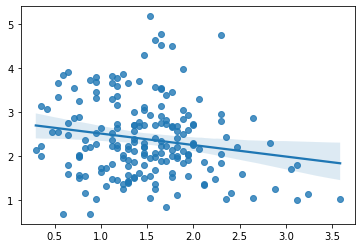

In [93]:
cmrq,pmrq = stats.pearsonr(mrq_t_pq_avg, throughput_t_pq)
print("MRQ -- C: "+str(cmrq)+" P-value: "+str(pmrq))
sns.regplot(x=mrq_t_pq_avg, y=throughput_t_pq)

<b> Correlation of performance and nasa-tlx-avg

NASA-TLX -- C: -0.23472408186641353 P-value: 0.001149769135597594


<AxesSubplot:>

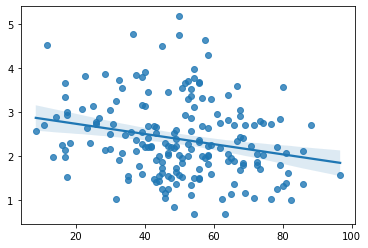

In [94]:
cnasa,pnasa = stats.pearsonr(nasa_r_t_pq_avg, throughput_t_pq)
print("NASA-TLX -- C: "+str(cnasa)+" P-value: "+str(pnasa))
sns.regplot(x=nasa_r_t_pq_avg, y=throughput_t_pq)

In [95]:
multipletests([pmrq,pnasa], alpha=0.05, method='bonferroni')

(array([ True,  True]),
 array([0.03001222, 0.00229954]),
 0.025320565519103666,
 0.025)

-------------------------------------------------------

In [96]:

fa_array


array([[ 0.,  4.,  0., ..., 15., 25., 10.],
       [ 2.,  4.,  0., ..., 35., 85., 75.],
       [ 0.,  3.,  0., ..., 40., 85., 25.],
       ...,
       [ 0.,  1.,  0., ..., 50., 30., 20.],
       [ 0.,  0.,  0., ..., 15., 20., 10.],
       [ 0.,  3.,  0., ..., 45., 85., 70.]])

In [152]:
mc_df=pd.DataFrame(fa_array)

In [153]:
vif_data = pd.DataFrame()
# vif_data["feature"] = mc_df.columns

In [154]:
# calculating VIF for each feature
vif_data["VIF_nasa"] = [variance_inflation_factor(mc_df.values, i+17)
                          for i in range(6)]
  
vif_data

,VIF_nasa
0,17.965893
1,4.385208
2,8.981509
3,3.549584
4,19.886697
5,5.988770


In [166]:
selected_scale=pd.DataFrame()
selected_scale['pd']=mc_df[18]
selected_scale['p']=mc_df[18]
selected_scale['f']=mc_df[18]
selected_scale.values[]

array([5., 5., 5.])

In [167]:
selected_scale
# calculating VIF for each feature
vif_data_se["VIF_nasa"] = [variance_inflation_factor(selected_scale.values,i)
                          for i in range(3)]
  
vif_data

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_nasa
0,inf
1,inf
2,inf


In [100]:
vif_data_mrq = [variance_inflation_factor(mc_df.values, i)
                          for i in range(17)]
  
vif_data

,VIF_nasa
0,17.965893
1,4.385208
2,8.981509
3,3.549584
4,19.886697
5,5.988770


In [101]:
vif_data["VIF_nasa"].mean(), pd.DataFrame(vif_data_mrq).mean()

(10.126276660629047,
 0    4.99522
 dtype: float64)

In [102]:
vif_data_total = [variance_inflation_factor(mc_df.values, i)
                          for i in range(23)]

In [103]:
vt=pd.DataFrame(vif_data_total)

In [104]:
vt['rank']= vt[0].rank()

In [171]:
vt_selected= vt[vt[0]<=3.3]

In [172]:
vt_selected

,0,rank
0,1.975128,1.0
1,2.689052,6.0
2,2.178112,4.0
3,2.870081,7.0
11,2.499064,5.0
12,1.989936,2.0
16,2.060993,3.0


In [106]:
mrq_vif= mc_df.loc[:,0:16]

In [107]:
nasa_vif= mc_df.loc[:,17:22]

In [108]:
mrq_vif

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,0.0
1,2.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,0.0,3.0,4.0,3.0,2.0,0.0
2,0.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0
3,2.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0
4,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0
187,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
188,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
189,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,4.0,4.0,3.0,0.0


In [109]:
vif___N= [variance_inflation_factor(nasa_vif.values, i)
                          for i in range(6)]
  
vif___N, pd.DataFrame(vif___N).mean()

([13.727435201139945,
  3.298281228068739,
  7.65702528866694,
  3.1360081019349746,
  17.3061870854178,
  5.059846740970201],
 0    8.364131
 dtype: float64)

In [110]:
vif___M= [variance_inflation_factor(mrq_vif.values, i)
                          for i in range(17)]
  
vif___M, pd.DataFrame(vif___M).mean()

([1.9115131576203428,
  2.51495053849563,
  2.1041699851972755,
  2.77833201766213,
  6.454569008374927,
  7.13574091021062,
  8.802050580948338,
  5.021643236087588,
  4.1737512924200155,
  5.0573040968604,
  5.256104885171261,
  2.383886955791983,
  1.889742010781468,
  10.189253892226462,
  3.203245417313392,
  7.996071942784517,
  1.987899399739259],
 0    4.638837
 dtype: float64)

In [111]:
nasa_vif[17]

0      20.0
1      95.0
2      75.0
3      80.0
4      95.0
       ... 
186    75.0
187    25.0
188    25.0
189    75.0
190    90.0
Name: 17, Length: 191, dtype: float64

In [112]:
mrq_vif

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,0.0
1,2.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,0.0,3.0,4.0,3.0,2.0,0.0
2,0.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0
3,2.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0
4,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0
187,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
188,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
189,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,4.0,4.0,3.0,0.0


In [113]:
mrq_vif_plus=pd.concat([mrq_vif, nasa_vif.loc[:,20]], axis=1,ignore_index=True, sort=False)
mrq_vif_plus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,0.0,15.0
1,2.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,0.0,3.0,4.0,3.0,2.0,0.0,35.0
2,0.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0,40.0
3,2.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0,70.0
4,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,10.0
187,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,15.0
188,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,50.0
189,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,4.0,4.0,3.0,0.0,15.0


In [114]:

vif___M_one_by_one= [variance_inflation_factor(mrq_vif_plus.values, i)
                          for i in range(18)]
  
vif___M_one_by_one, pd.DataFrame(vif___M_one_by_one).mean()

([1.9258434380842029,
  2.5164669740265375,
  2.1043116896437435,
  2.7783658343641418,
  6.54134702241679,
  7.161356819350705,
  8.88506463787704,
  5.022939132468213,
  4.1766486343193545,
  5.05779365884378,
  5.355202303539358,
  2.4182355444867087,
  1.8903497064994892,
  10.203241012684702,
  3.258234965569466,
  8.09122644324162,
  2.015355721648435,
  2.5068525427587383],
 0    4.550491
 dtype: float64)

7.623153143937255 || 3.355072286553076 || 5.318746250757699 || 2.5068525427587383 || 6.206334873943168 || 3.5727669442206462

In [168]:
mrq_vif_plus=pd.concat([mrq_vif, nasa_vif.loc[:,18],nasa_vif.loc[:,20],nasa_vif.loc[:,22]], axis=1,ignore_index=True, sort=False)
mrq_vif_plus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,0.0,5.0,15.0,10.0
1,2.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,0.0,3.0,4.0,3.0,2.0,0.0,60.0,35.0,75.0
2,0.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0,3.0,0.0,35.0,40.0,25.0
3,2.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0,10.0,70.0,45.0
4,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,100.0,10.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,15.0,10.0,15.0
187,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,10.0,15.0,45.0
188,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,50.0,50.0,20.0
189,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,4.0,4.0,3.0,0.0,35.0,15.0,10.0


In [170]:

vif___M_one_by_one= [variance_inflation_factor(mrq_vif_plus.values, i)
                          for i in range(20)]
  
vif___M_one_by_one, pd.DataFrame(vif___M_one_by_one).mean()

([1.9420043741972046,
  2.5263872053964977,
  2.149963340085771,
  2.850670979036493,
  7.016063487880157,
  7.728827789273295,
  9.129061936876434,
  5.070520128328288,
  4.188999172601291,
  5.248058405334548,
  5.44655915053888,
  2.466841267272137,
  1.972656607122979,
  10.70868049309751,
  3.283507387257229,
  8.158333935799813,
  2.0344676244060063,
  3.7081141202440415,
  2.867707471810323,
  4.486818597543427],
 0    4.649212
 dtype: float64)

In [173]:
vt_selected

,0,rank
0,1.975128,1.0
1,2.689052,6.0
2,2.178112,4.0
3,2.870081,7.0
11,2.499064,5.0
12,1.989936,2.0
16,2.060993,3.0


In [175]:
fa_df= pd.DataFrame(fa_array)

In [176]:
fa_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,2.0,2.0,...,2.0,1.0,2.0,0.0,20.0,5.0,25.0,15.0,25.0,10.0
1,2.0,4.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,2.0,...,4.0,3.0,2.0,0.0,95.0,60.0,90.0,35.0,85.0,75.0
2,0.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,4.0,...,4.0,3.0,3.0,0.0,75.0,35.0,90.0,40.0,85.0,25.0
3,2.0,2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,0.0,80.0,10.0,65.0,70.0,80.0,45.0
4,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,1.0,95.0,100.0,95.0,10.0,95.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,...,4.0,0.0,4.0,0.0,75.0,15.0,60.0,10.0,60.0,15.0
187,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,...,3.0,0.0,3.0,0.0,25.0,10.0,50.0,15.0,55.0,45.0
188,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.0,25.0,50.0,30.0,50.0,30.0,20.0
189,0.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,1.0,...,4.0,4.0,3.0,0.0,75.0,35.0,30.0,15.0,20.0,10.0


In [222]:
s_df=pd.DataFrame()
s_df[0]=fa_df[0]
s_df[1]=fa_df[1]
s_df[2]=fa_df[2]
s_df[3]=fa_df[3]
s_df[4]=fa_df[11]
s_df[5]=fa_df[12]
s_df[6]=fa_df[16]
# -------------------------
s_df[7]=fa_df[20] #P
s_df[8]=fa_df[14] #visual phonetic
s_df[9]=fa_df[18] #PD
s_df[10]=fa_df[8] # Spatial concentrative process

In [223]:
s_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,15.0,1.0,5.0,2.0
1,2.0,4.0,0.0,0.0,0.0,3.0,0.0,35.0,3.0,60.0,3.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,40.0,3.0,35.0,0.0
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,70.0,2.0,10.0,2.0
4,4.0,1.0,1.0,1.0,4.0,1.0,1.0,10.0,4.0,100.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,15.0,2.0
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,10.0,0.0
188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,1.0,50.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,35.0,3.0


In [224]:

for i in range(23):
    ds_df=s_df
    ds_df=pd.concat([ds_df, fa_df.loc[:,i]], axis=1,ignore_index=True, sort=False)
    vif___SM_one_by_one= variance_inflation_factor(ds_df.values, 11)
    print(vif___SM_one_by_one)

inf
inf
inf
inf
4.48178204026067
4.147571569171199
3.8842862485235345
3.7862375891510367
inf
3.621667600001736
3.3349068132214423
inf
inf
4.427095225553067
inf
3.9920737195300666
inf
5.810881119994124
inf
4.374796974736246
inf
7.158740337288105
3.5972120628211166


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


P20:1.4800934096662597


In [225]:
for i in range(11):
#     ds_df=s_df
#     ds_df=pd.concat([ds_df, fa_df.loc[:,i]], axis=1,ignore_index=True, sort=False)
    vif___SM_one_by_one= variance_inflation_factor(s_df.values, i)
    print(vif___SM_one_by_one)

1.8508540256919945
2.1237371783222274
1.9402499923092975
2.6251332048244747
2.3019122551324407
1.8197186181477496
1.9066870671623584
2.030736606096569
2.570268869746467
2.583484286788443
2.711617874200497
